<a href="https://colab.research.google.com/github/dipesh0078/PyTorch-Workflow/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)


#1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

#Make 1000 samples

n_samples=1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [2]:
print(f"First 5 sample of X:{X[:5]}")
print(f"First 5 sample of y:{y[:5]}")

First 5 sample of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:[1 1 1 1 0]


In [3]:
#Make Dataframe of circle data
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [63]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

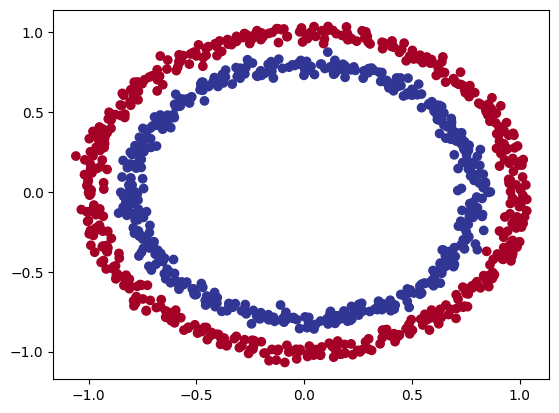

In [4]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note : The data we are working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

#1.1 Check input and Output shapes

In [5]:
X.shape, y.shape
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
#View the first example of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Values for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Values for one sample of X:(2,) and the same for y:()


###1.2 Turn data into tensors and create train and test splits

In [34]:
#Turn data into tensors
import torch
#X=torch.from_numpy(X).type(torch.float) #after conversion
#y=torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

TypeError: expected np.ndarray (got Tensor)

In [35]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2,#20% of data will be test & 80% will be train
                                                   random_state=42)


In [14]:
len(X_train), len(X_test),len(y_train), len(y_test)

(800, 200, 800, 200)

##Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
#Import pytorch
import torch
from torch import nn

#Make device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
X_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

Now we have setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [24]:
#1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
 def __init__(self):
    super().__init__()
    #2. Create 2 nn.linear layers capable of handling the shapes of our data
     # self.layer_1=nn.Linear(in_features=2, out_features=5) #take in 2 features and upscales to 5 features
     #self.layer_2=nn.Linear(in_features=5, out_features=1) #take in 5 features from previous layer and outputs a single feature (same shape as y)
    self.two_linear_layers=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
     )
  #3. Define a forward() method that outlines the forward pass
def forward(self,x):
    #return self.layer_2(self.layer_1(x)) #x-> layer_1-> layer_2-> output
    return two_linear_layers(x)
#4. Instantiate an instance of our model class and send it to the target device
model_0= CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [27]:
#let's replicate above model using nn.sequential()
'''model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
     ).to(device)

model_0'''

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [30]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3177, -0.5663],
                      [-0.6464, -0.4801],
                      [-0.3762, -0.0685],
                      [ 0.6767, -0.4284],
                      [ 0.2217,  0.0672]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3353,  0.0812,  0.0557,  0.4490, -0.6783], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0309, -0.2823, -0.1499, -0.2542, -0.3265]], device='cuda:0')),
             ('1.bias', tensor([0.3200], device='cuda:0'))])

In [39]:
#Make predictions
with torch.inference_mode():
 untrained_preds= model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)},shape:{untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)},shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200,shape:torch.Size([200, 1])
Length of test samples:200,shape:torch.Size([200, 2])

First 10 predictions:
tensor([[0.5623],
        [0.6257],
        [0.3177],
        [0.6319],
        [0.1934],
        [0.2330],
        [0.5102],
        [0.4179],
        [0.3233],
        [0.6286]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [40]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

###2.1 Setup loss function and optimizer
loss function or optimizer is problem specific
For classification we can use binary cross entropy (BCE)
for optimizer two of the most common and useful are SGD and Adam

* For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`
* For different optimizer go through `torch.optim`

In [56]:
# Setup Loss function
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss= sigmoid activation function

optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [58]:
#Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


###3. Train model

To train our model we are going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward (backpropagation)
5. Optimizer step (gradient descent)

###3.1 Going from raw logits-> prediction probabilities-> prediction labels

Our model outputs are going to be raw **logits**.

We can convcert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification )

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax()

In [42]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
 y_logits= model_0(X_test.to(device))[:5]
y_logits

tensor([[0.5623],
        [0.6257],
        [0.3177],
        [0.6319],
        [0.1934]], device='cuda:0')

In [44]:
#Use the sigmoid activation in our model logits to turn them into prediction probabilities
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6370],
        [0.6515],
        [0.5788],
        [0.6529],
        [0.5482]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* y_pred_probs>=0.5, y=1 (class 1)
* y_pred_probs<0.5, y=0 (class 0)

In [47]:
#Find the predicted labels
y_preds=torch.round(y_pred_probs)

#In full logits->pred probs->pred labels
y_preds_labels= torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### 3.2 Building a training and test loop

In [73]:
torch.manual_seed(42)

#Set the number of epochs
epochs=1000

#Put data to target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#Building training and evaluation loop

for epoch in range(epochs):
  ###Training
   model_0.train()

   #1. Forward pass
   y_logits=model_0(X_train).squeeze()
   y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels

   #2. Calculate loss/accuracy
   #loss=loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
              #y_train)
   loss=loss_fn(y_logits, ##nn.BCEWithLogitsLoss expects raw logits as input
                y_train)
   acc=accuracy_fn(y_true=y_train,
                   y_pred=y_pred)

   #3 Optimizer zero grad
   optimizer.zero_grad()

  #4 Loss Backward (backpropagation)
   loss.backward()


  #5. optimizer step (gradient descent)
   optimizer.step()

  ### Testing
   model_0.eval()
   with torch.inference_mode():
    #1. Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

  #print out what is happenin

   if epoch%10==0:
    print(f"Epoch:{epoch}|Loss:{loss:.5f}, Acc:{acc:.2f}%| Test Loss:{test_loss:.5f}, Test accuracy:{ test_acc:.2f}")


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

##4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...
So to inspect it lets make some predictions and make them visual

Import a function called `plot_decision_boundary()`

In [64]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo (if its not already downloaded)

if Path("helper_function.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


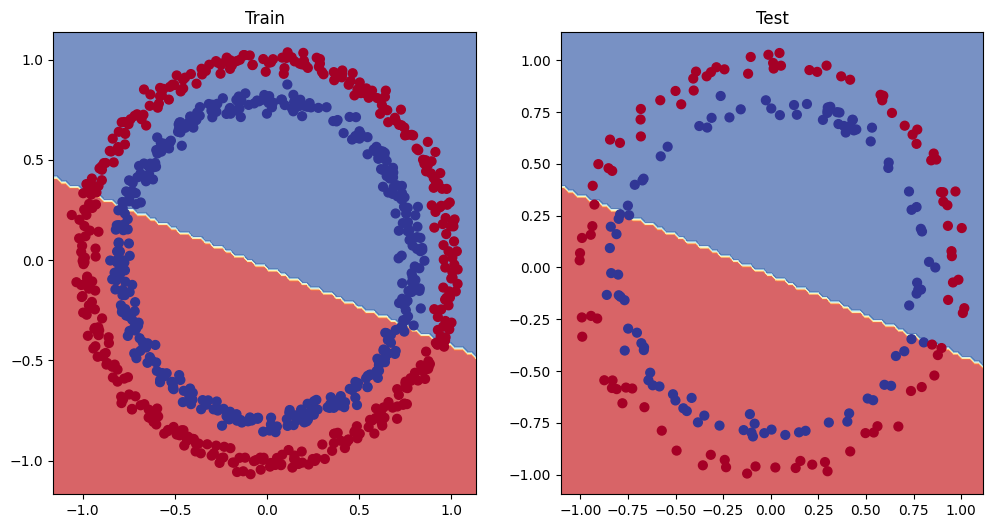

In [66]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model prespective)

* Add more layers
* Add more hidden layers - from 5 to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* change the loss function



In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1